In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluar Modelo
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [463]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1)

# df.info()
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [464]:
df.dropna(inplace=True)
# df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [465]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [466]:
df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)
df.describe()

,Survived,Pclass,Sex,Age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [467]:
df.columns = ['Sobrevivientes', 'Clase', 'Genero', 'Edad']

df.describe()

,Sobrevivientes,Clase,Genero,Edad
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [468]:
df.to_excel('titanicLimpio.xlsx')

In [469]:
correlacion_matriz = df.corr().abs()
most_correlacion = correlacion_matriz.unstack().sort_values(ascending=False).drop_duplicates()

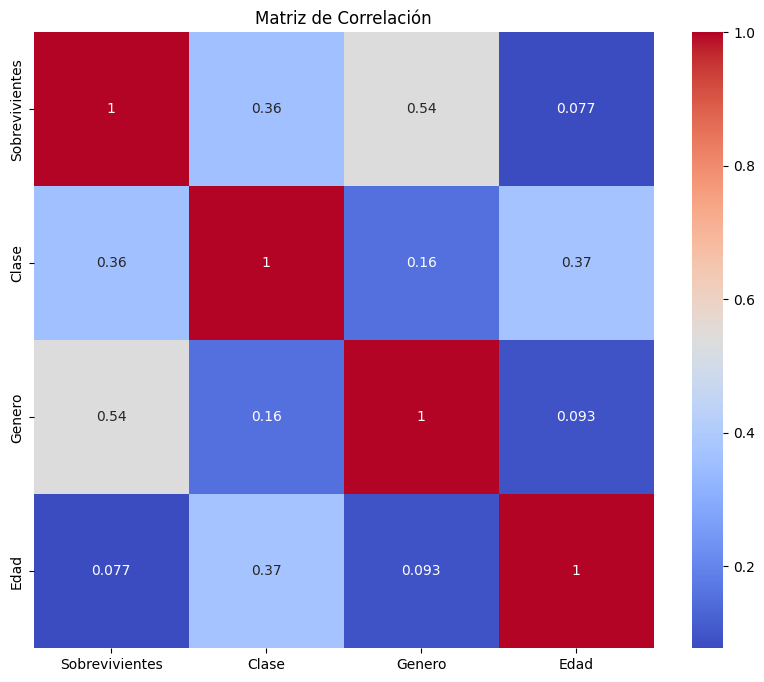

In [470]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [471]:
for (var1, var2), correlacion in most_correlacion.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación en '{correlacion}'")

Las variables 'Sobrevivientes' y 'Sobrevivientes' tienen una correlación en '1.0'
Las variables 'Sobrevivientes' y 'Genero' tienen una correlación en '0.5388255930146358'
Las variables 'Clase' y 'Edad' tienen una correlación en '0.36922601531551735'
Las variables 'Sobrevivientes' y 'Clase' tienen una correlación en '0.3596526820868464'
Las variables 'Clase' y 'Genero' tienen una correlación en '0.15546030092742963'
Las variables 'Genero' y 'Edad' tienen una correlación en '0.09325357685567738'
Las variables 'Sobrevivientes' y 'Edad' tienen una correlación en '0.07722109457217756'


In [472]:
variables = ['Clase', 'Genero', 'Edad']

x = df[variables]
y = df['Sobrevivientes']

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [474]:
model = LinearRegression()

In [475]:
model.fit(x_train, y_train)

LinearRegression()

In [476]:
y_pred = model.predict(x_test)

In [477]:
print("Coheficiente de Determinación: %.2f" % r2_score(y_test, y_pred))
print("Rol Cuadratico Medio: %.2f" % mean_squared_error(y_test, y_pred))


Coheficiente de Determinación: 0.28
Rol Cuadratico Medio: 0.17


In [478]:
classe = 3
genero = 1
edad = 26

pred = model.predict([[classe, genero, edad]])
pred_procentaje = pred[0] * 100
print(f"La predicción de Supervivencia: {round(pred_procentaje, 2)}%")

La predicción de Supervivencia: 60.44%


c:\Users\UwU\Documents\python_darkking\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [479]:
import pickle

with open('modelo_regresion.pkl', 'wb') as file:
    
    pickle.dump(model, file)

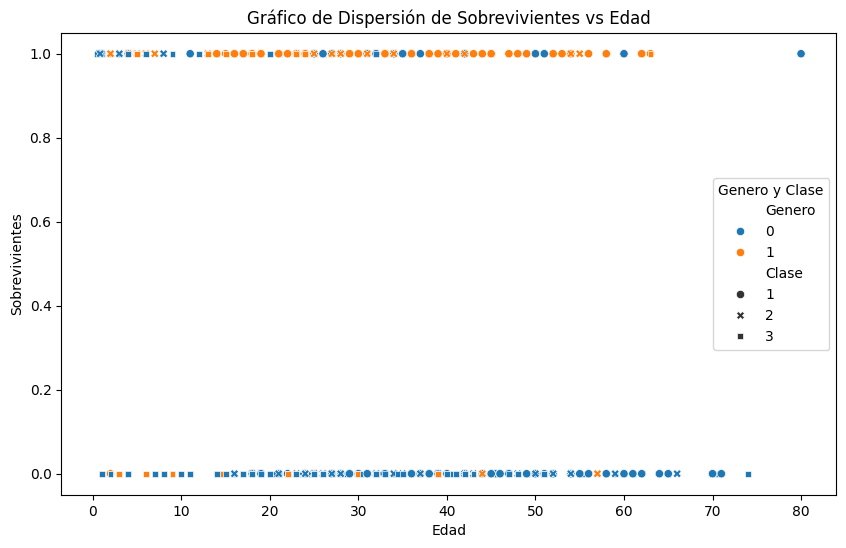

In [480]:
# Generar el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Sobrevivientes', hue='Genero', style='Clase', data=df)
plt.title('Gráfico de Dispersión de Sobrevivientes vs Edad')
plt.xlabel('Edad')
plt.ylabel('Sobrevivientes')
plt.legend(title='Genero y Clase')
plt.show()